## Beijing Air Quality MultiVariate Time Series Analysis and Forecasting.

>  This hourly data set contains the PM2.5 data of US Embassy in Beijing. Meanwhile, meteorological data from Beijing Capital International Airport are also included.
	

---
#### Importing the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet

import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Downloads/PRSA_data_2010.1.1-2014.12.31.csv')

In [3]:
data.head()

,No,year,month,day,hour,PM_2point5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21.0,-11.0,1021.0,NW,1.79,0.000001,0.0009
1,2,2010,1,1,1,NaN,-21.0,-12.0,1020.0,NW,4.92,0.000010,0.0009
2,3,2010,1,1,2,NaN,-21.0,-11.0,1019.0,NW,6.71,0.000010,0.0009
3,4,2010,1,1,3,NaN,-21.0,-14.0,1019.0,NW,9.84,0.000010,0.0009
4,5,2010,1,1,4,NaN,-20.0,-12.0,1018.0,NW,12.97,0.000010,0.0009


---
#### Cleaning the data as needed.

In [4]:
'''Filling the null values in the PM_2point5 feature'''
# data.PM_2point5.median()    = 72

data.PM_2point5.fillna(72, inplace=True)

data.head()

,No,year,month,day,hour,PM_2point5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,72.0,-21.0,-11.0,1021.0,NW,1.79,0.000001,0.0009
1,2,2010,1,1,1,72.0,-21.0,-12.0,1020.0,NW,4.92,0.000010,0.0009
2,3,2010,1,1,2,72.0,-21.0,-11.0,1019.0,NW,6.71,0.000010,0.0009
3,4,2010,1,1,3,72.0,-21.0,-14.0,1019.0,NW,9.84,0.000010,0.0009
4,5,2010,1,1,4,72.0,-20.0,-12.0,1018.0,NW,12.97,0.000010,0.0009


In [5]:
'''Making a separate date feature with the available features for further processing'''
data['date'] = data[data.columns[1:4]].apply(lambda x: '-'.join(x.astype(str)),axis=1)

In [6]:
data['date'] = pd.to_datetime(data['date'], infer_datetime_format=True)

### Using the powerful Facebook's Library Prophet for forecasting.
**Prophet** follows the sklearn model API. We create an instance of the Prophet class and then call its fit and predict methods.
> - The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.
> - Thus we will have to manipulate the data accordingly for best usage of the library.
---
_**Time series forecasting of Pressure (hPa)**_

,ds,y
0,2010-01-01,1021.0
1,2010-01-01,1020.0
2,2010-01-01,1019.0
3,2010-01-01,1019.0
4,2010-01-01,1018.0


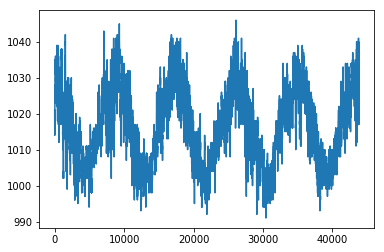

In [7]:
temp = data[['date', 'PRES']]
temp.columns = ['ds','y']
temp.y.plot()
temp.head()

In [8]:
# initializing the fbprophet model and fitting the data
model = Prophet()
model.fit(temp)

#creating a separate dataframe for predicted values
future_data = model.make_future_dataframe(periods=12, freq = 'm')
forecast_data = model.predict(future_data)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


- We will be forecasting the data 12 months in teh future.

In [9]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
43831,2015-08-31,1015.550055,981.082227,1046.273490
43832,2015-09-30,1021.068984,983.308137,1058.322833
43833,2015-10-31,1026.338263,980.052526,1069.642450
43834,2015-11-30,1028.012335,974.222314,1078.118895
43835,2015-12-31,1034.381226,970.437555,1092.177628


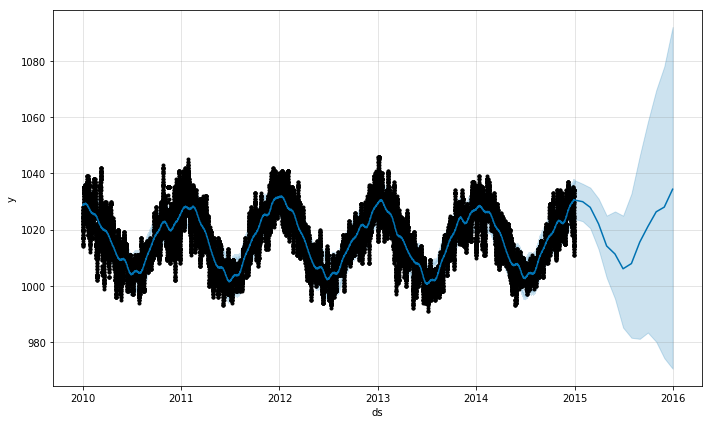

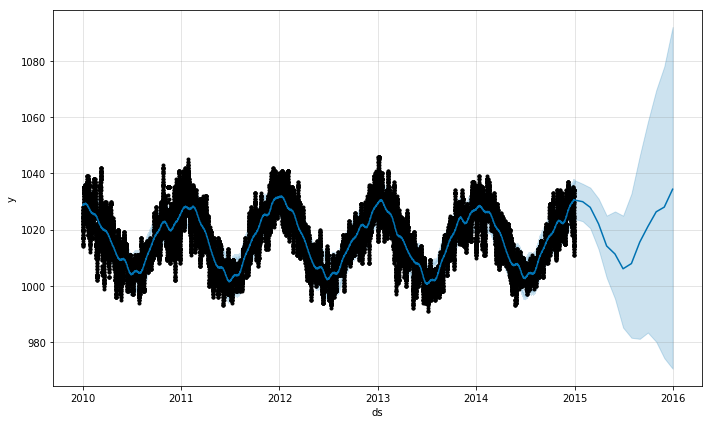

In [10]:
model.plot(forecast_data)

- We can also see the forecast components. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series.

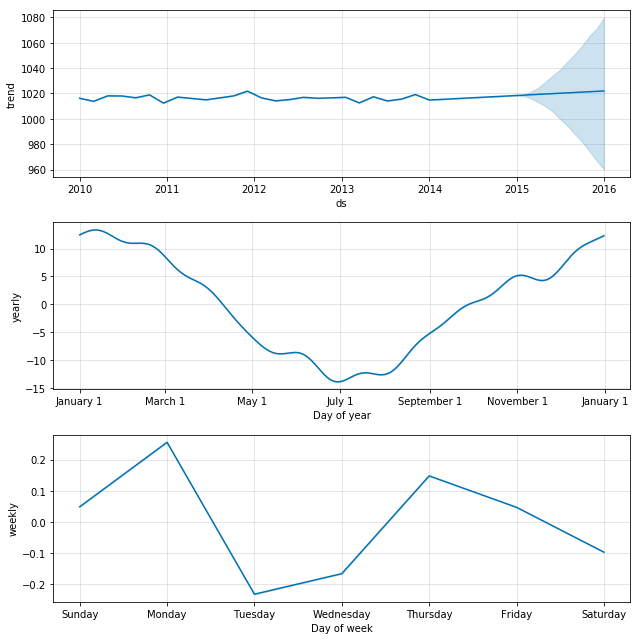

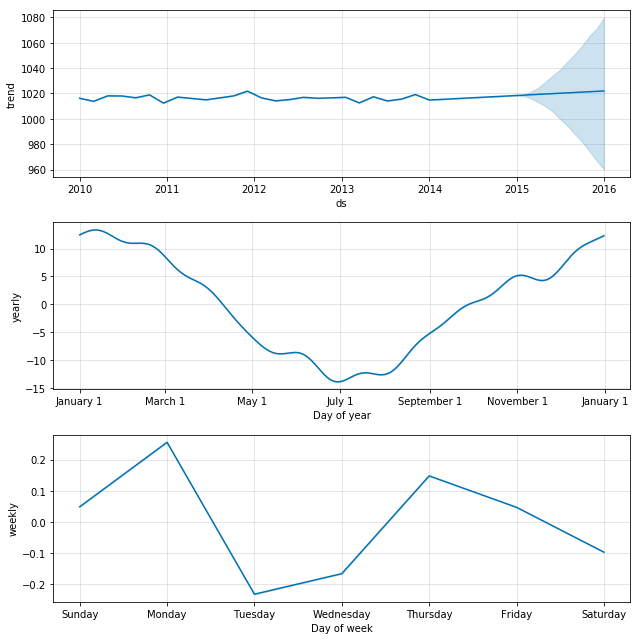

In [11]:
model.plot_components(forecast_data)

---
_**Time series forecasting of Temperature in  Beijing**_

,ds,y
0,2010-01-01,-11.0
1,2010-01-01,-12.0
2,2010-01-01,-11.0
3,2010-01-01,-14.0
4,2010-01-01,-12.0


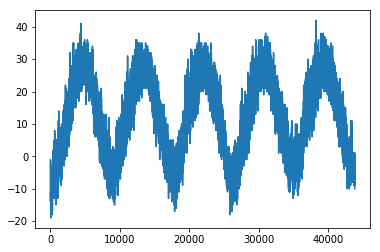

In [12]:
temp3 = data[['date', 'TEMP']]
temp3.columns = ['ds','y']
temp3.y.plot()
temp3.head()

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


              ds       yhat  yhat_lower  yhat_upper
43831 2015-08-31  23.130341   17.219279   29.323055
43832 2015-09-30  16.044260    9.277338   22.773187
43833 2015-10-31   8.593171    2.427729   15.013858
43834 2015-11-30  -0.423509   -7.253724    7.092037
43835 2015-12-31  -5.596348  -12.758652    1.663910


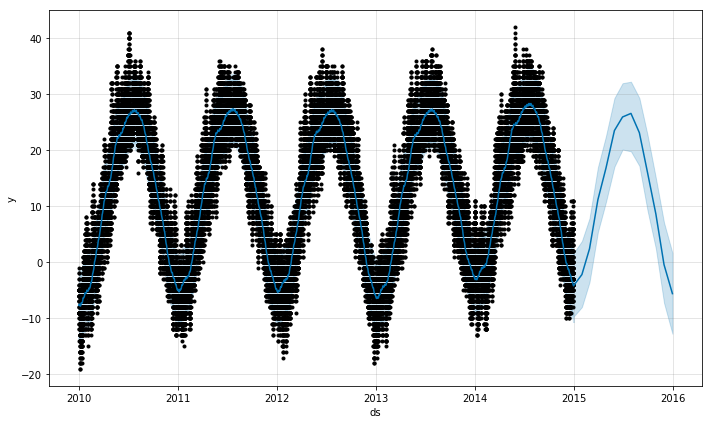

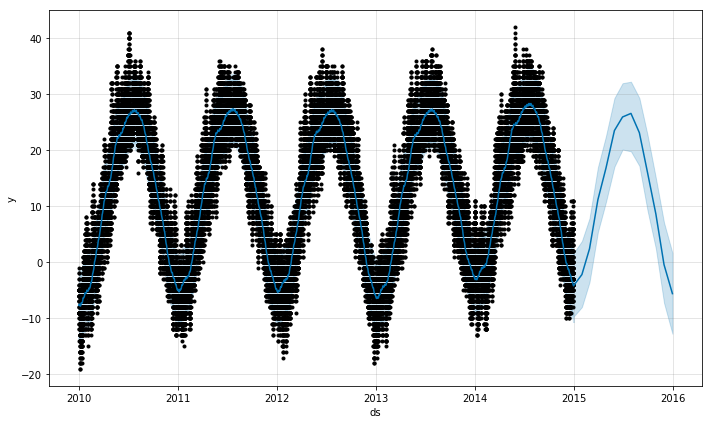

In [13]:
model = Prophet()
model.fit(temp3)

future_data = model.make_future_dataframe(periods=12, freq = 'm')

forecast_data = model.predict(future_data)
print(forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

model.plot(forecast_data)

- Temperature according to the yearly, weekly and daily seasonality.

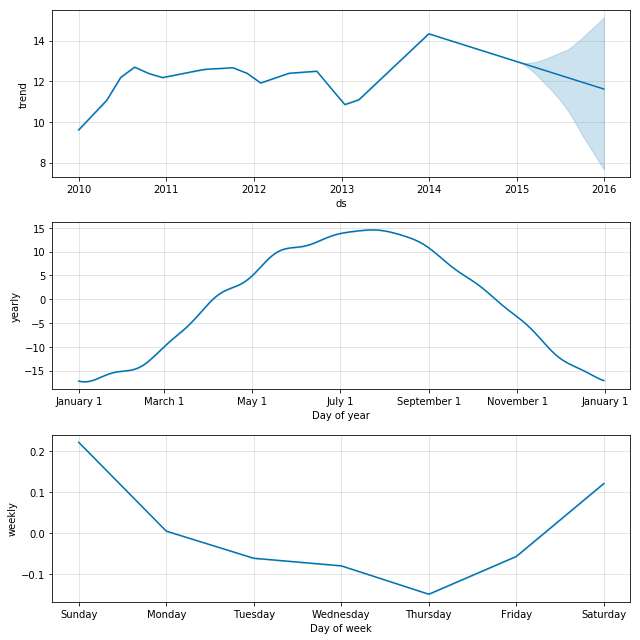

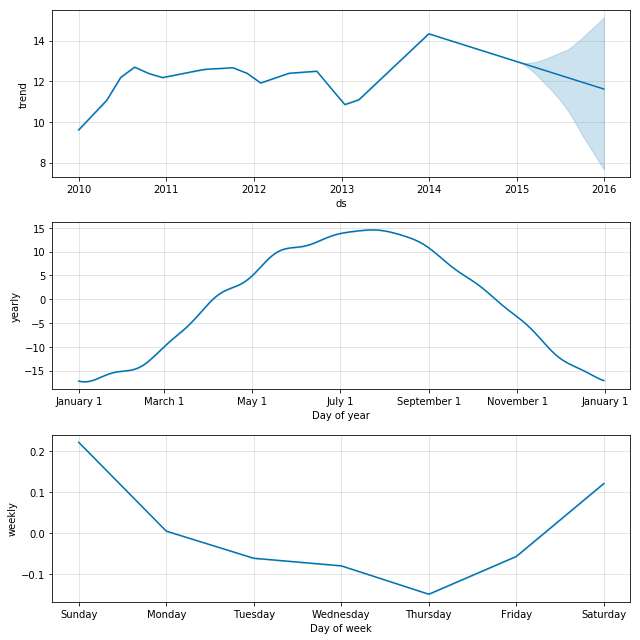

In [14]:
model.plot_components(forecast_data)

---
_**Time series forecasting of PM2.5 concentration (ug/m^3)**_

- _PM2.5 -> atmospheric particulate matter that have a diameter of less than 2.5 micrometers_

,ds,y
0,2010-01-01,72.0
1,2010-01-01,72.0
2,2010-01-01,72.0
3,2010-01-01,72.0
4,2010-01-01,72.0


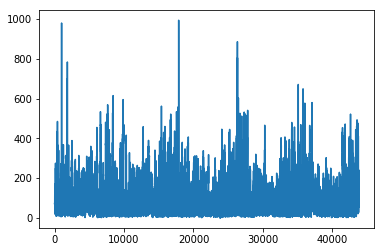

In [15]:
temp4 = data[['date', 'PM_2point5']]
temp4.columns = ['ds','y']
temp4.y.plot()
temp4.head()

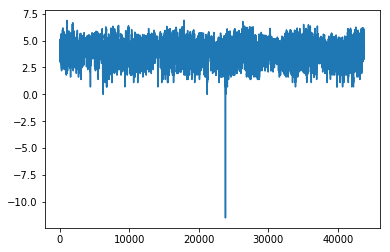

In [16]:
temp4['orig_y'] = temp4['y']
temp4['y'] = np.log(temp4['y'])

temp4.y.plot()

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


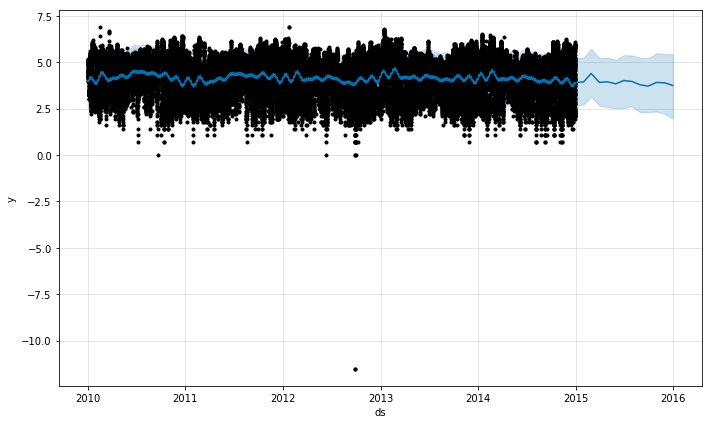

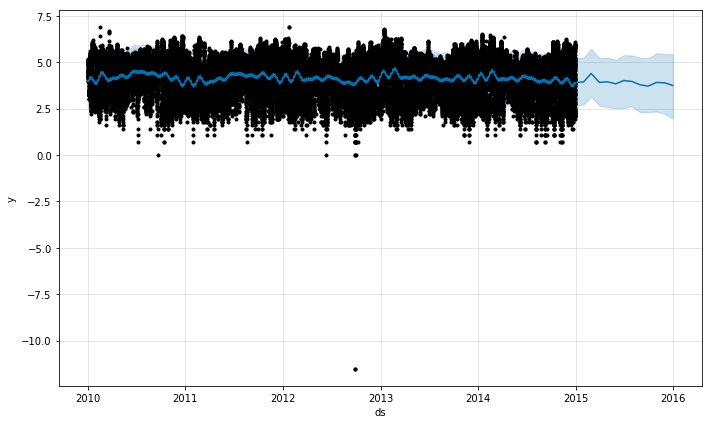

In [17]:
model = Prophet()
model.fit(temp4)

future_data = model.make_future_dataframe(periods=12, freq = 'm')

forecast_data = model.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

model.plot(forecast_data)

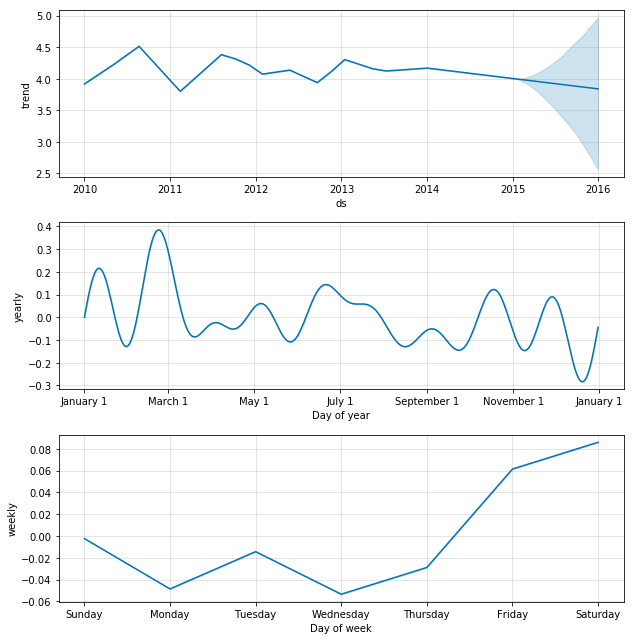

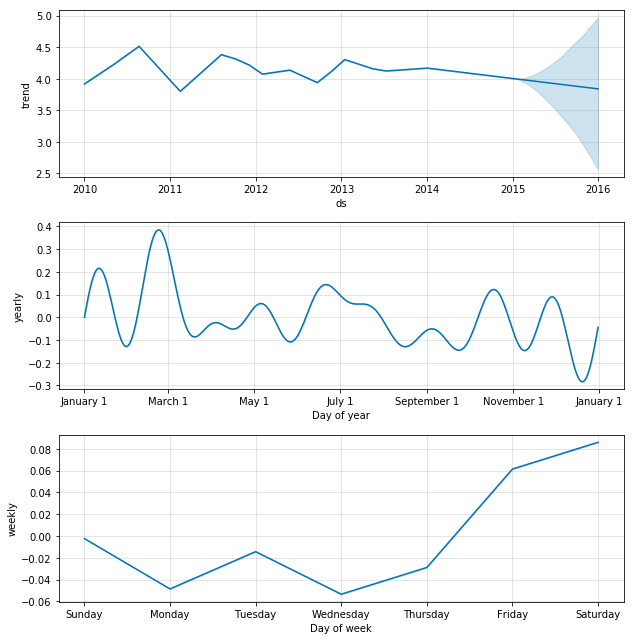

In [18]:
model.plot_components(forecast_data)

_**Time series forecasting of Cumulated hours of rain**_

,ds,y
0,2010-01-01,0.0009
1,2010-01-01,0.0009
2,2010-01-01,0.0009
3,2010-01-01,0.0009
4,2010-01-01,0.0009


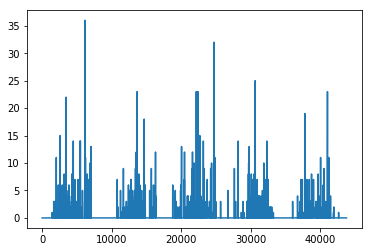

In [19]:
temp7 = data[['date', 'Ir']]
temp7.columns = ['ds','y']
temp7.y.plot()
temp7.head()

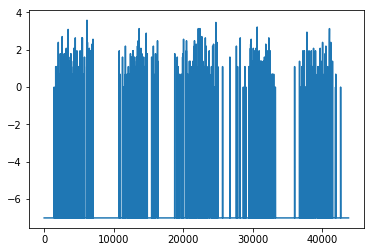

In [20]:
temp7['orig_y'] = temp7['y']
temp7['y'] = np.log(temp7['y'])

temp7.y.plot()

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


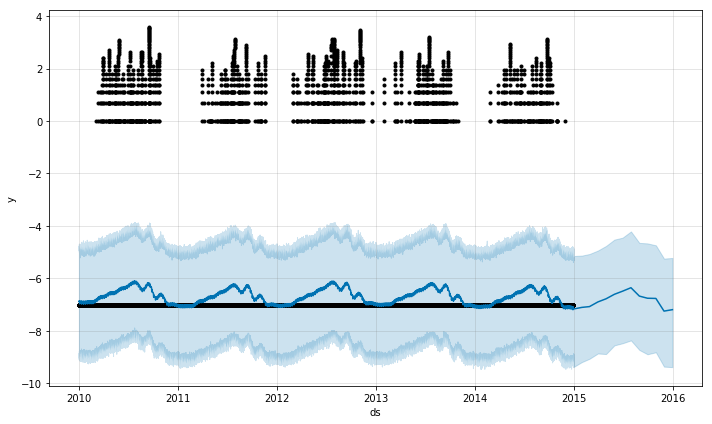

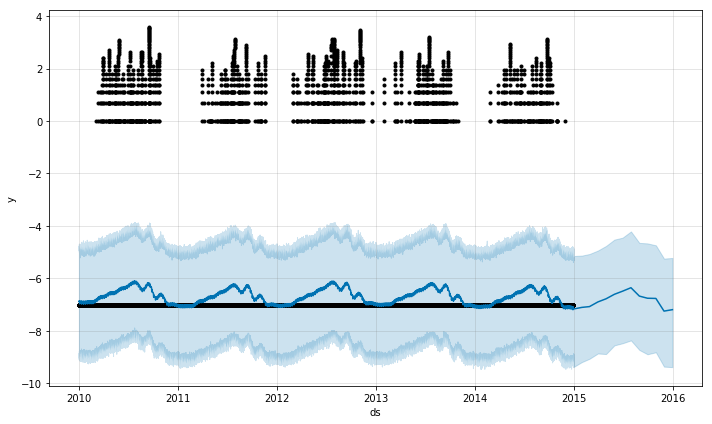

In [21]:
model = Prophet()
model.fit(temp7)

future_data = model.make_future_dataframe(periods=12, freq = 'm')

forecast_data = model.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

model.plot(forecast_data)

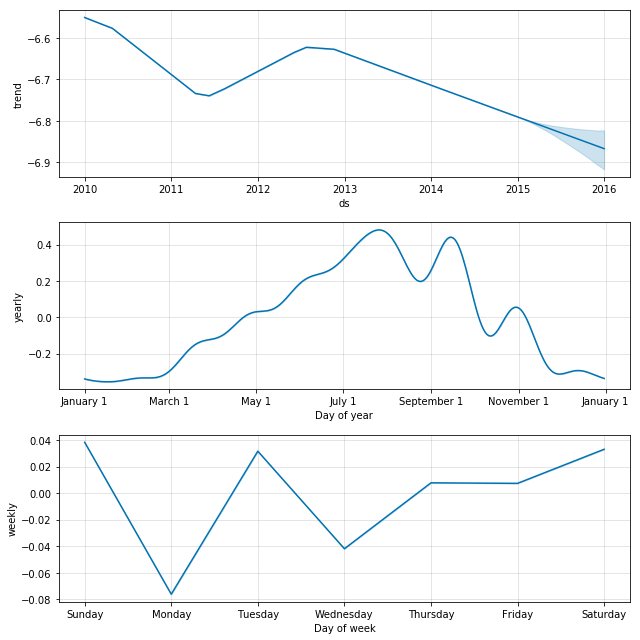

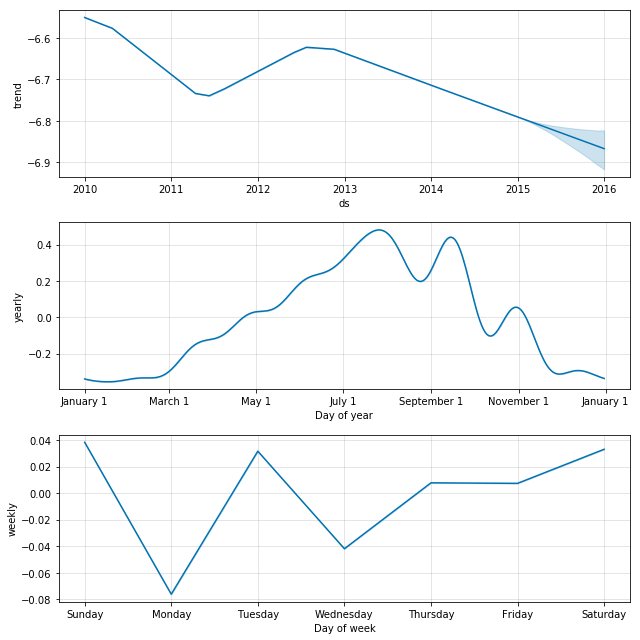

In [22]:
model.plot_components(forecast_data)

_**Time series forecasting of Cumulated hours of snowfall**_

In [23]:
# temp6 = data[['date', 'Is']]
# temp6.columns = ['ds','y']
# temp6.y.plot()
# temp6.head()

# temp6['orig_y'] = temp6['y']
# temp6['y'] = np.log(temp6['y'])

# temp6.y.plot()

# model = Prophet()
# model.fit(temp6)

# future_data = model.make_future_dataframe(periods=12, freq = 'm')

# forecast_data = model.predict(future_data)

# model.plot(forecast_data)

# forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

# model.plot_components(forecast_data)

_**Time series forecasting of Cumulated wind speed (m/s)**_

In [24]:
# temp5 = data[['date', 'Iws']]
# temp5.columns = ['ds','y']
# temp5.y.plot()
# temp5.head()

# temp5['orig_y'] = temp5['y']
# temp5['y'] = np.log(temp5['y'])

# temp5.y.plot()

# model = Prophet()
# model.fit(temp5)

# future_data = model.make_future_dataframe(periods=12, freq = 'm')

# forecast_data = model.predict(future_data)
# forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

# model.plot(forecast_data)

# model.plot_components(forecast_data)